In [5]:

# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
import pandas as pd
import numpy as np
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error, mean_squared_error
import calendar
from datetime import datetime
from prophet.diagnostics import performance_metrics



/home/sam/Documents/projects/practice/general/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### For Cluster 0

In [6]:
def change_date_format(date_string, new_format):

    parts = date_string.split('/')
    if len(parts) != 3:
        parts = date_string.split('-')
    if len(parts) != 3:
        print("Error: Invalid date format")
        return None

    try:
        for i in parts:
            if int(i) > 40:
                year = int(i)
            
        
        month = int(parts[1])

        

        # Create a new datetime object with the adjusted day value
        # days_in_month = calendar.monthrange(year, month)[1]
        date = datetime(year, month, 1)

        # Convert the new datetime object to the desired format
        new_date_string = date.strftime(new_format)
        return new_date_string
    except (ValueError, OverflowError) as e:
        print(f"Error: {e}")
        return None

In [7]:
TEST_SIZE = -3

In [8]:
def fb_prohet(path):
    df = read_csv(path, header=0)

    # prepare expected column names
    # df.columns = ['ds', 'y']
    # df['ds'] = df.apply(lambda x: change_date_format(x.ds, '%Y-%m-%d'), axis=1)

    df.columns = ['ds', 'y']
    df['ds'] = pd.to_datetime(df['ds'], format='%d/%m/%Y')

    train = df.iloc[:TEST_SIZE]
    test = df.iloc[TEST_SIZE:]

    # create test dataset, remove last 3 months
    # train = df.drop(df.index[TEST_SIZE:])
    print(train.tail())
    print(test.head())
    # define the model
    model = Prophet()
    # model = Prophet(seasonality_mode='multiplicative')
    # fit the model
    model.fit(train)
    # define the period for which we want a prediction
    # future = list()
    # for i in range(1, (TEST_SIZE*-1) + 1):
    #     date = '2016-%01d' % i
    #     future.append([date])
    future = test["ds"].to_list()
    future = DataFrame(future)
    future.columns = ['ds']
    future['ds'] = to_datetime(future['ds'])

        
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # calculate MAE between expected and predicted values for december
    y_true = df['y'][TEST_SIZE:].values
    y_pred = forecast['yhat'].values
    # print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
    mae = mean_absolute_error(y_true, y_pred)
    print('MAE: %.3f' % mae)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print('RMSE: %.3f' % rmse)
    # plot expected vs actual
    pyplot.plot(y_true, label='Actual')
    pyplot.plot(y_pred, label='Predicted')
    pyplot.legend()
    pyplot.show()

14:35:13 - cmdstanpy - INFO - Chain [1] start processing
14:35:13 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   250
41 2015-06-01   400
42 2015-07-01  1900
43 2015-08-01  1500
44 2015-09-01  1800
           ds     y
45 2015-10-01  2100
46 2015-11-01  2350
47 2015-12-01  2250
MAE: 207.790
RMSE: 213.475


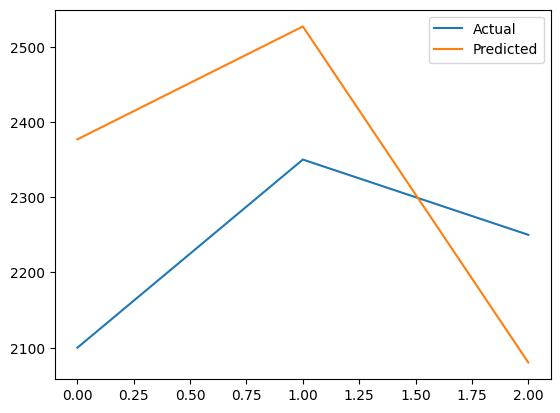

In [9]:
fb_prohet('../data/new_single_cluster_0.csv')


14:35:13 - cmdstanpy - INFO - Chain [1] start processing


14:35:13 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   563
41 2015-06-01   457
42 2015-07-01  1887
43 2015-08-01  1549
44 2015-09-01  1792
           ds     y
45 2015-10-01  2133
46 2015-11-01  2328
47 2015-12-01  2431
MAE: 114.558
RMSE: 144.876


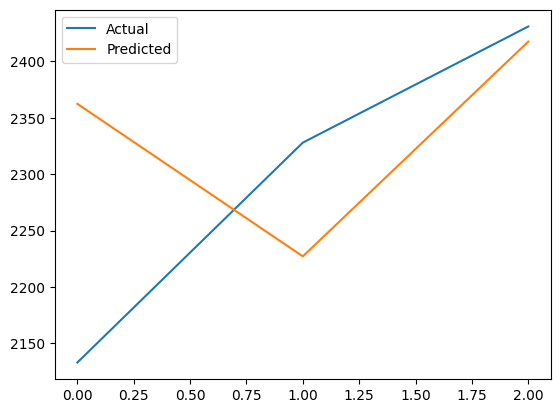

In [10]:
fb_prohet('../data/new_single_cluster_00.csv')


14:35:17 - cmdstanpy - INFO - Chain [1] start processing


14:35:18 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   637
41 2015-06-01   743
42 2015-07-01  1751
43 2015-08-01  1634
44 2015-09-01  1812
           ds     y
45 2015-10-01  2126
46 2015-11-01  2305
47 2015-12-01  2489
MAE: 94.916
RMSE: 96.163


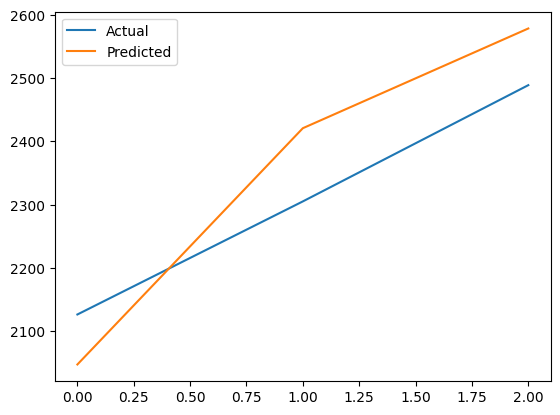

In [11]:
fb_prohet('../data/new_single_cluster_000.csv')


14:35:18 - cmdstanpy - INFO - Chain [1] start processing


14:35:19 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   625
41 2015-06-01   497
42 2015-07-01  1903
43 2015-08-01  1572
44 2015-09-01  1691
           ds     y
45 2015-10-01  2188
46 2015-11-01  2375
47 2015-12-01  2429
MAE: 94.150
RMSE: 98.384


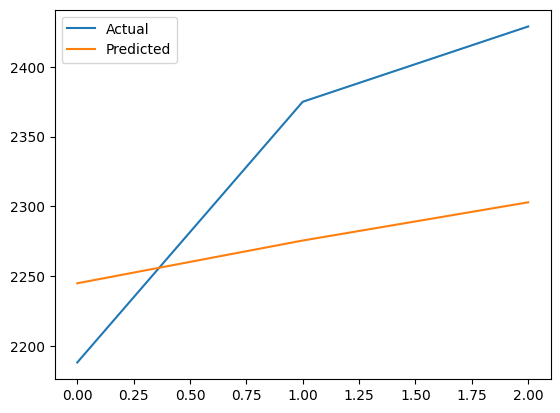

In [12]:
fb_prohet('../data/new_single_cluster_0000.csv')


14:35:23 - cmdstanpy - INFO - Chain [1] start processing
14:35:24 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   489
41 2015-06-01   538
42 2015-07-01  1764
43 2015-08-01  1689
44 2015-09-01  1823
           ds     y
45 2015-10-01  2146
46 2015-11-01  2347
47 2015-12-01  2456
MAE: 174.588
RMSE: 202.159


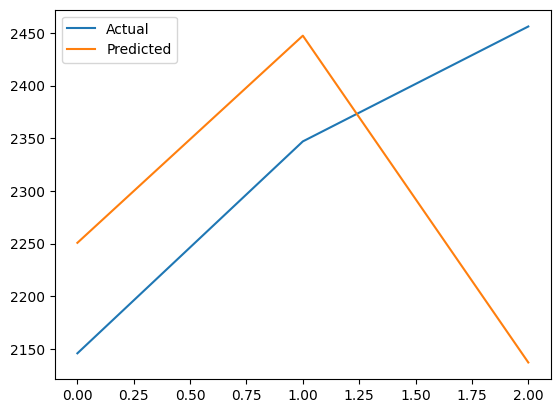

In [13]:
fb_prohet('../data/new_single_cluster_00000.csv')

### For Clustring 1

14:35:27 - cmdstanpy - INFO - Chain [1] start processing


14:35:28 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   463
41 2015-06-01   357
42 2015-07-01  1457
43 2015-08-01  1369
44 2015-09-01  1492
           ds     y
45 2015-10-01  1933
46 2015-11-01  2028
47 2015-12-01  2111
MAE: 46.138
RMSE: 64.294


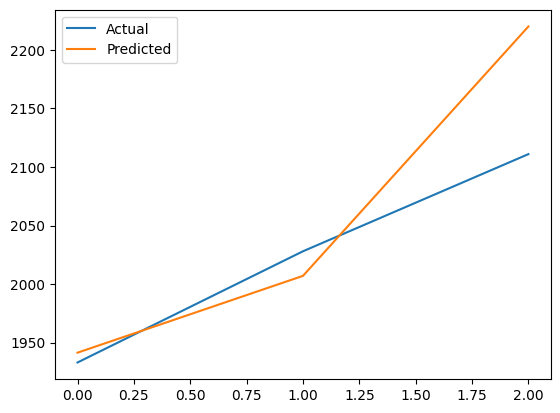

In [14]:
fb_prohet('../data/new_single_cluster_1.csv')


14:35:28 - cmdstanpy - INFO - Chain [1] start processing


14:35:28 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   337
41 2015-06-01   343
42 2015-07-01  1371
43 2015-08-01  1434
44 2015-09-01  1612
           ds     y
45 2015-10-01  1926
46 2015-11-01  2105
47 2015-12-01  2089
MAE: 65.067
RMSE: 75.438


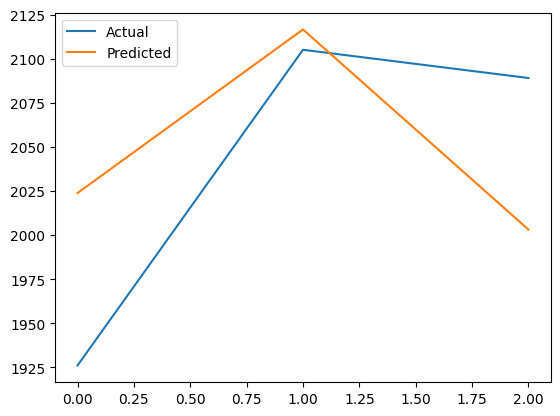

In [15]:
fb_prohet('../data/new_single_cluster_11.csv')


14:35:33 - cmdstanpy - INFO - Chain [1] start processing
14:35:33 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   425
41 2015-06-01   497
42 2015-07-01  1303
43 2015-08-01  1472
44 2015-09-01  1691
           ds     y
45 2015-10-01  1988
46 2015-11-01  2075
47 2015-12-01  2109
MAE: 121.865
RMSE: 153.403


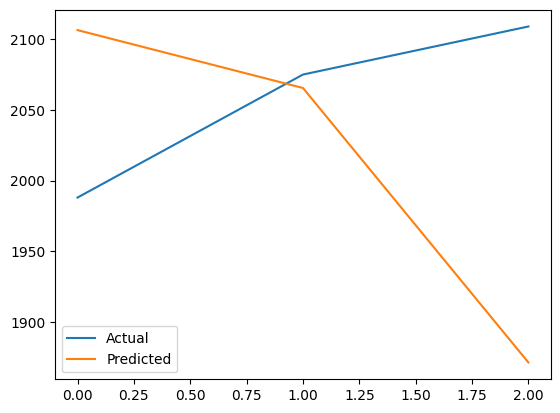

In [16]:
fb_prohet('../data/new_single_cluster_111.csv')


14:35:34 - cmdstanpy - INFO - Chain [1] start processing


14:35:34 - cmdstanpy - INFO - Chain [1] done processing


           ds     y
40 2015-05-01   489
41 2015-06-01   438
42 2015-07-01  1564
43 2015-08-01  1389
44 2015-09-01  1723
           ds     y
45 2015-10-01  2146
46 2015-11-01  2077
47 2015-12-01  2056
MAE: 122.121
RMSE: 133.471


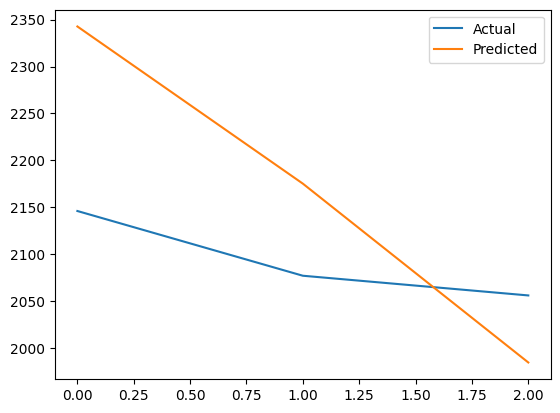

In [17]:
fb_prohet('../data/new_single_cluster_1111.csv')


14:35:34 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   395
41 2015-06-01   473
42 2015-07-01  1356
43 2015-08-01  1435
44 2015-09-01  1678
           ds     y
45 2015-10-01  2057
46 2015-11-01  1992
47 2015-12-01  2180


14:35:34 - cmdstanpy - INFO - Chain [1] done processing


MAE: 62.524
RMSE: 65.691


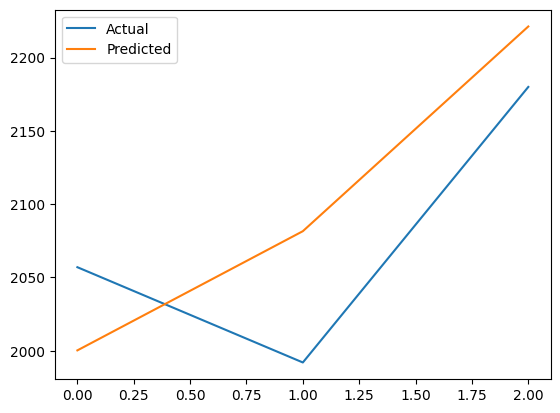

In [18]:
fb_prohet('../data/new_single_cluster_11111.csv')

### For cluster 2

14:35:34 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   863
41 2015-06-01   757
42 2015-07-01  1937
43 2015-08-01  1869
44 2015-09-01  1992
           ds     y
45 2015-10-01  2633
46 2015-11-01  2798
47 2015-12-01  2711


14:35:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 104.822
RMSE: 121.152


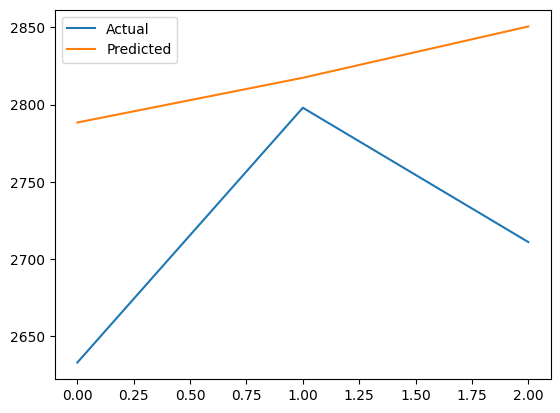

In [19]:
fb_prohet('../data/new_single_cluster_2.csv')


14:35:35 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   835
41 2015-06-01   843
42 2015-07-01  1851
43 2015-08-01  1824
44 2015-09-01  2072
           ds     y
45 2015-10-01  2646
46 2015-11-01  2785
47 2015-12-01  2889


14:35:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 40.063
RMSE: 45.525


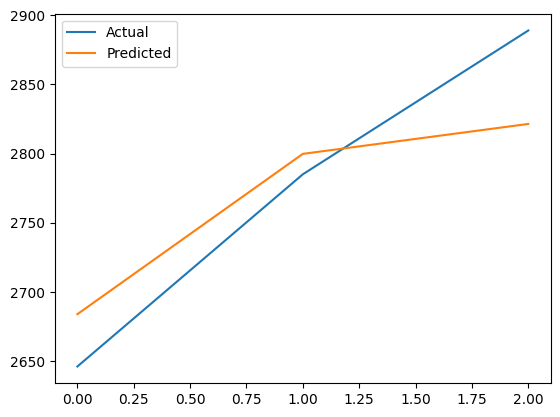

In [20]:
fb_prohet('../data/new_single_cluster_22.csv')


14:35:35 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   872
41 2015-06-01   895
42 2015-07-01  1923
43 2015-08-01  1954
44 2015-09-01  2132
           ds     y
45 2015-10-01  2775
46 2015-11-01  2784
47 2015-12-01  2856


14:35:35 - cmdstanpy - INFO - Chain [1] done processing


MAE: 62.078
RMSE: 65.452


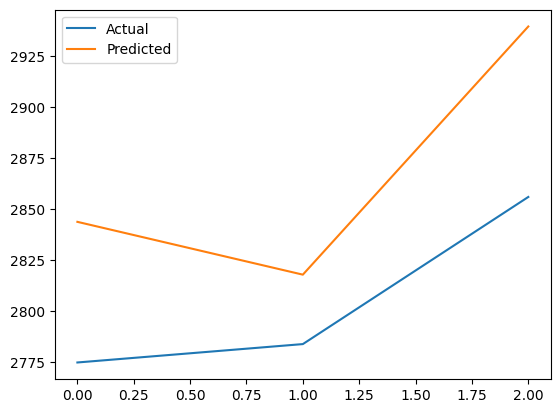

In [21]:
fb_prohet('../data/new_single_cluster_222.csv')


14:35:36 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   848
41 2015-06-01   834
42 2015-07-01  1864
43 2015-08-01  1974
44 2015-09-01  2173
           ds     y
45 2015-10-01  2761
46 2015-11-01  2752
47 2015-12-01  2881


14:35:36 - cmdstanpy - INFO - Chain [1] done processing


MAE: 23.636
RMSE: 33.682


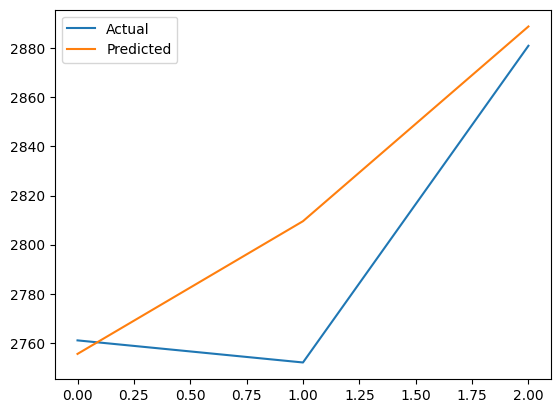

In [22]:
fb_prohet('../data/new_single_cluster_2222.csv')


14:35:36 - cmdstanpy - INFO - Chain [1] start processing


           ds     y
40 2015-05-01   819
41 2015-06-01   871
42 2015-07-01  1943
43 2015-08-01  1951
44 2015-09-01  2104
           ds     y
45 2015-10-01  2785
46 2015-11-01  2794
47 2015-12-01  2872


14:35:36 - cmdstanpy - INFO - Chain [1] done processing


MAE: 80.282
RMSE: 96.226


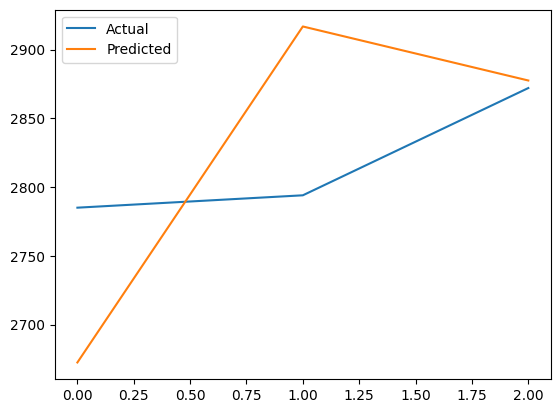

In [23]:
fb_prohet('../data/new_single_cluster_22222.csv')